In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.io as sio

from principal_RBM_alpha import init_RBM, train_RBM, lire_alpha_digit, generer_image_RBM
from principal_DBN_alpha import init_DBN, train_DBN, generer_image_DBN
import os

In [2]:
# Get the current working directory
current_directory = os.getcwd()

binary_alpha_digs_file = 'data\\binaryalphadigs.mat'

binary_alpha_digs_path = os.path.join(current_directory, binary_alpha_digs_file)

# 1. RBM analysis 

## 1.1 Number of neurons in hidden layers

In [3]:
epochs = 100
learning_rate = 0.01
batch_size = 128
characters_index = [2]
neurons_list = [320, 16, 32, 64, 128, 256, 512]

n_iter_gibs = 1000
n_imgs = 10

Training with epochs = 100 
neurons = 16 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


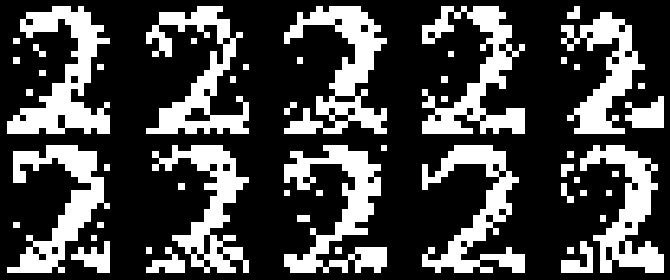

Training with epochs = 100 
neurons = 32 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


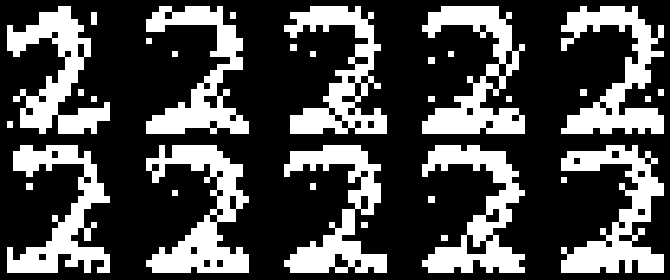

Training with epochs = 100 
neurons = 64 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


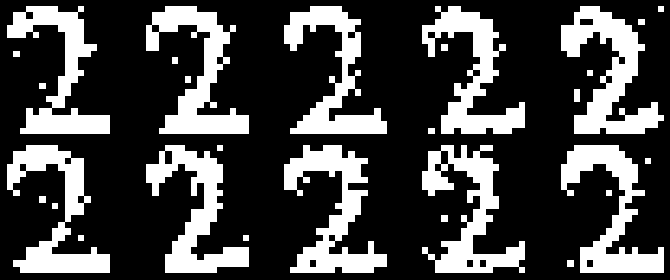

Training with epochs = 100 
neurons = 128 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


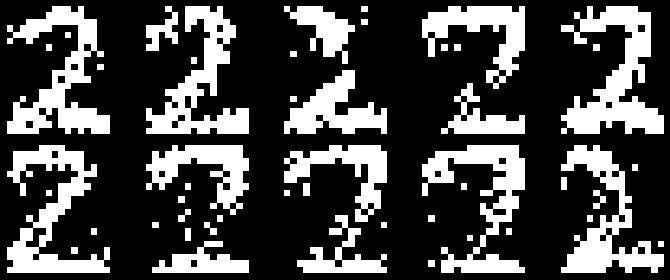

Training with epochs = 100 
neurons = 256 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


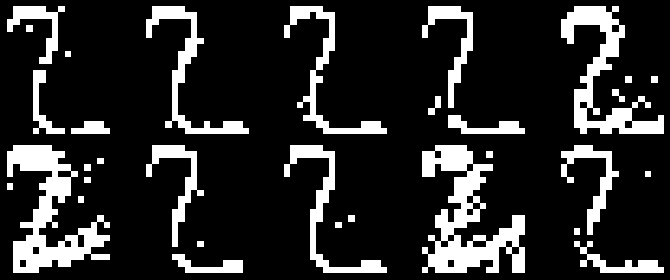

Training with epochs = 100 
neurons = 512 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


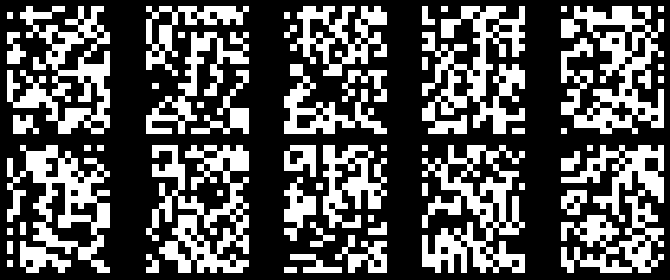

In [4]:
image = lire_alpha_digit(binary_alpha_digs_path, characters_index)

all_generated_imgs = []

for index in range(len(neurons_list) - 1) :
    
    W, a, b = init_RBM(neurons_list[0], neurons_list[index + 1])
    W, a, b, loss = train_RBM(image, W, a, b, epochs, learning_rate, batch_size, verbose=False)

    print('Training with epochs =' , epochs, '\nneurons =', neurons_list[index + 1], '\nlearning_rate = ', learning_rate, '\nbatch_size = ' , batch_size, '\non characters : ', characters_index)
    
    generated_imgs = generer_image_RBM(n_imgs, n_iter_gibs, W, a, b)
    
    all_generated_imgs.append(generated_imgs)

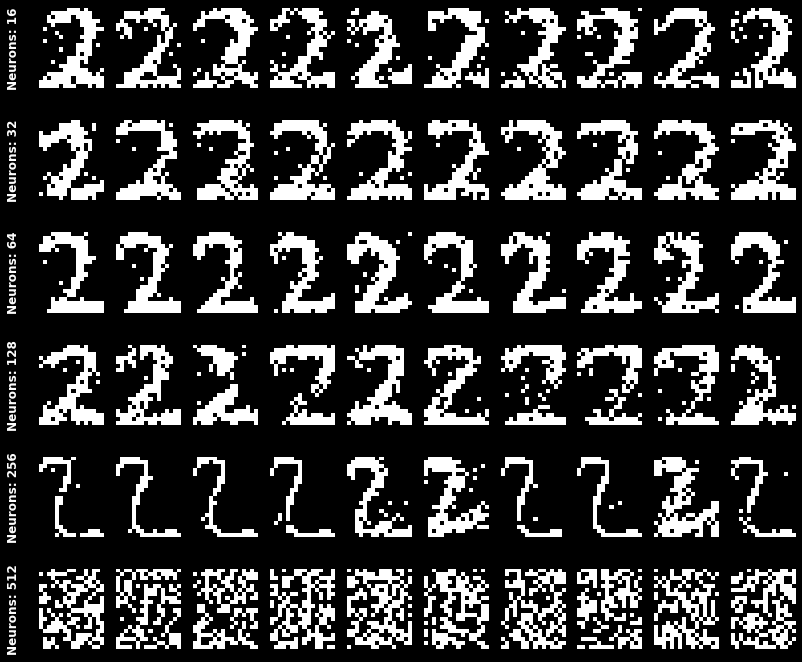

In [5]:
n_rows = len(neurons_list) - 1  
n_cols = n_imgs

# Further adjust the figure size if needed
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))

# Ensure axs is 2D for consistent indexing
axs = axs.reshape(n_rows, n_cols) if n_rows > 1 else np.expand_dims(axs, 0)

fig.patch.set_facecolor('black')

# Set spacing between subplots and adjust margins
plt.subplots_adjust(left=0.2, right=0.9, top=0.85, bottom=0.1, hspace=0.3, wspace=0.2)

for i in range(n_rows):
    for j in range(n_cols):
        axs[i, j].imshow(all_generated_imgs[i][j].reshape(20, 16), cmap='gray')
        axs[i, j].axis('off')

        # Adjust the neuron label positioning and font
        if j == 0:  # Only for the first column
            axs[i, j].text(-0.5, 0.5, f'Neurons: {neurons_list[i + 1]}', 
                           va='center', ha='left', rotation='vertical', 
                           fontsize=12, color="white", fontweight='bold', transform=axs[i, j].transAxes)

plt.show()

## 1.2 Number of different characters

In [6]:
epochs = 100
learning_rate = 0.01
batch_size = 128
n_neurons = [320, 128]
characters_list = [[2], [2, 3], [2, 3, 4], [2, 3, 4, 5], [2, 3, 4, 5, 7], [2, 3, 4, 5, 7, 9]]

n_iter_gibs = 1000
n_imgs = 10

training with epochs = 100 
neurons = [320, 128] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


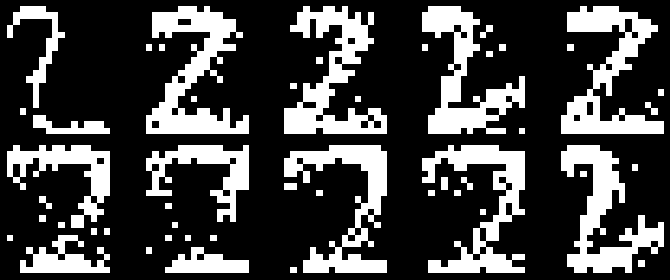

training with epochs = 100 
neurons = [320, 128] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2, 3]


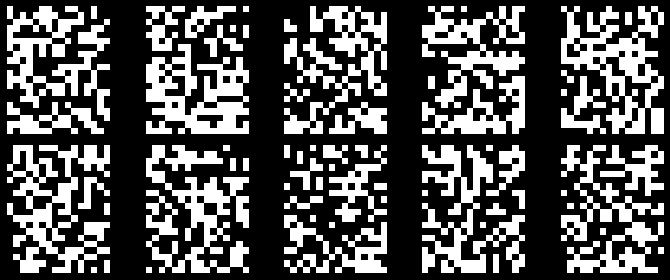

training with epochs = 100 
neurons = [320, 128] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2, 3, 4]


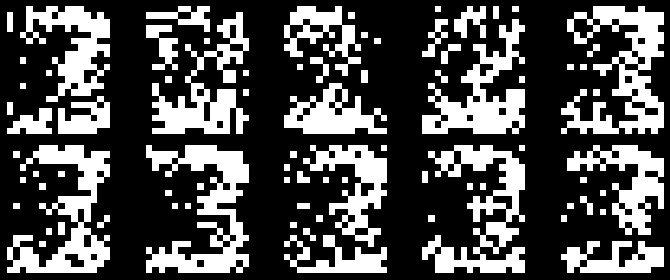

training with epochs = 100 
neurons = [320, 128] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2, 3, 4, 5]


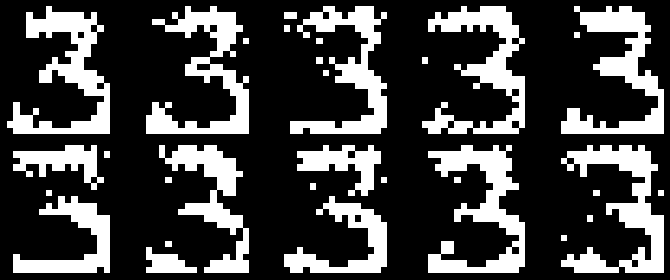

training with epochs = 100 
neurons = [320, 128] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2, 3, 4, 5, 7]


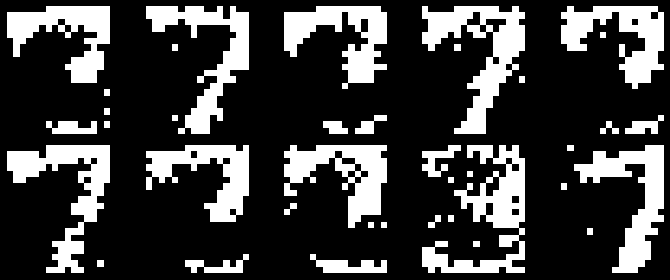

training with epochs = 100 
neurons = [320, 128] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2, 3, 4, 5, 7, 9]


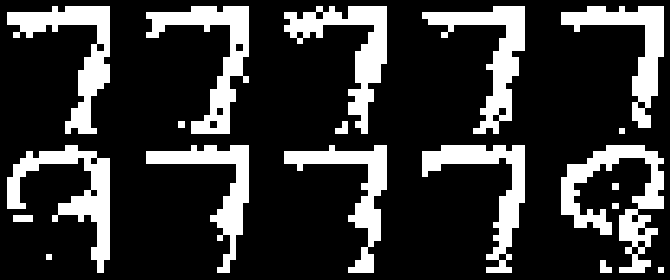

In [7]:
all_generated_imgs = []

for index in range(len(characters_list)):
    
    image = lire_alpha_digit(binary_alpha_digs_path, characters_list[index])
    
    W,a,b = init_RBM(n_neurons[0], n_neurons[1])
    W,a,b,loss = train_RBM(image, W, a, b, epochs, learning_rate, batch_size, verbose= False)

    print('Training with epochs =' , epochs, '\nneurons =', n_neurons, '\nlearning_rate = ', learning_rate, '\nbatch_size = ' , batch_size, '\non characters : ', characters_list[index])

    generated_imgs = generer_image_RBM(n_imgs, n_iter_gibs, W, a, b)
    
    all_generated_imgs.append(generated_imgs)

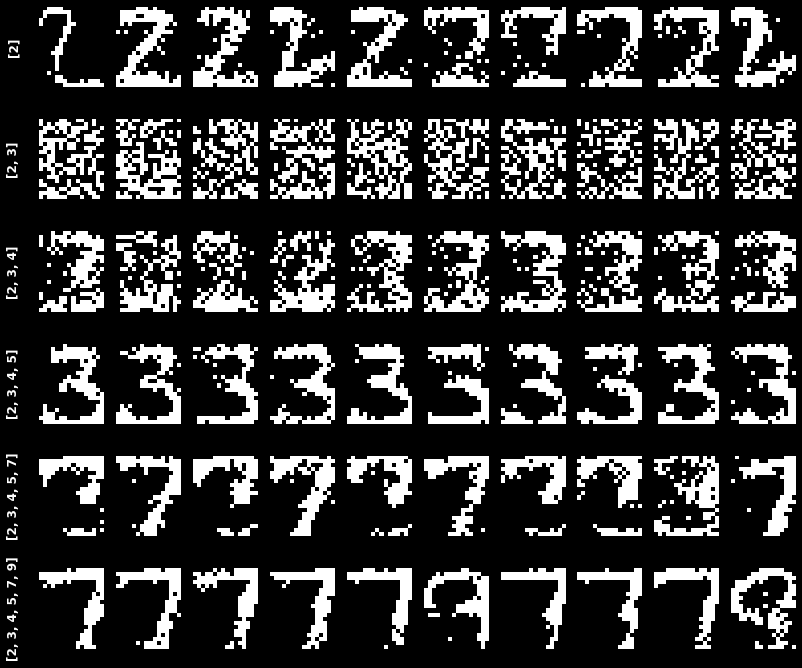

In [8]:
n_rows = len(characters_list)  
n_cols = n_imgs

# Further adjust the figure size if needed
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))

# Ensure axs is 2D for consistent indexing
axs = axs.reshape(n_rows, n_cols) if n_rows > 1 else np.expand_dims(axs, 0)

fig.patch.set_facecolor('black')

# Set spacing between subplots and adjust margins
plt.subplots_adjust(left=0.2, right=0.9, top=0.85, bottom=0.1, hspace=0.3, wspace=0.2)

for i in range(n_rows):
    for j in range(n_cols):
        axs[i, j].imshow(all_generated_imgs[i][j].reshape(20, 16), cmap='gray')
        axs[i, j].axis('off')

        # Adjust the neuron label positioning and font
        if j == 0:  # Only for the first column
            axs[i, j].text(-0.5, 0.5, f'{characters_list[i]}', 
                           va='center', ha='left', rotation='vertical', 
                           fontsize=12, color="white", fontweight='bold', transform=axs[i, j].transAxes)

plt.show()

# 2. DBN analysis

## 2.1 The number of neurons in hidden layers

In [9]:
input_neurons = 320
min_neurons_per_layer = 16
hidden_layer_count = 3
max_power_of_two = 5

neurons_list = []
for exponent in range(max_power_of_two + 1):
    hidden_layer_neurons = min_neurons_per_layer * 2**exponent
    neurons_list.append([input_neurons] + [hidden_layer_neurons] * hidden_layer_count)
    
print(f'List of neurons: {neurons_list}')
epochs = 100
learning_rate = 0.01
batch_size = 128
characters_index = [2]

n_iter_gibs = 1000
n_imgs = 10

List of neurons: [[320, 16, 16, 16], [320, 32, 32, 32], [320, 64, 64, 64], [320, 128, 128, 128], [320, 256, 256, 256], [320, 512, 512, 512]]


Training with epochs = 100 
neurons = [320, 16, 16, 16] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


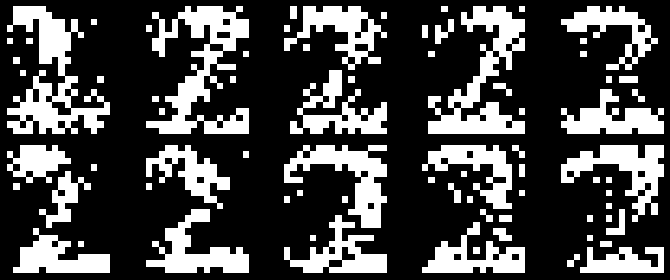

Training with epochs = 100 
neurons = [320, 32, 32, 32] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


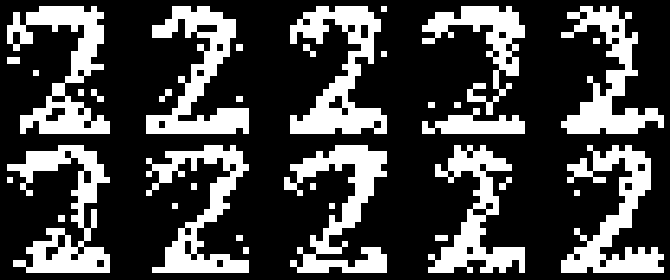

Training with epochs = 100 
neurons = [320, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


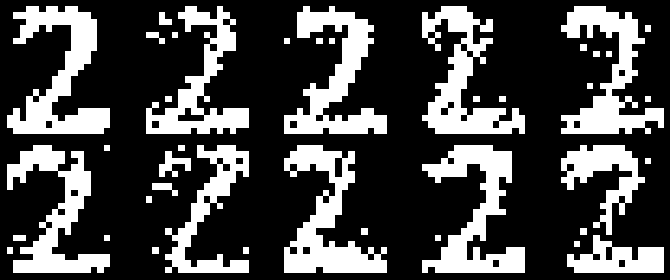

Training with epochs = 100 
neurons = [320, 128, 128, 128] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


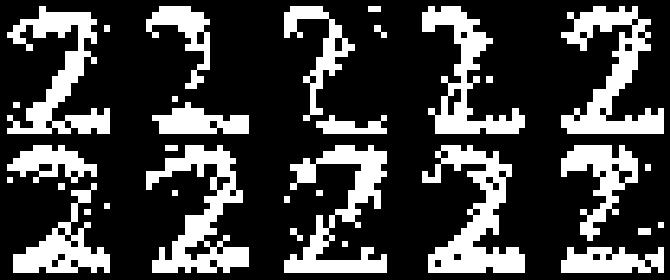

Training with epochs = 100 
neurons = [320, 256, 256, 256] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


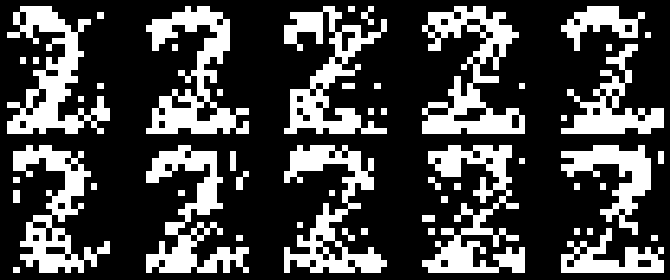

Training with epochs = 100 
neurons = [320, 512, 512, 512] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


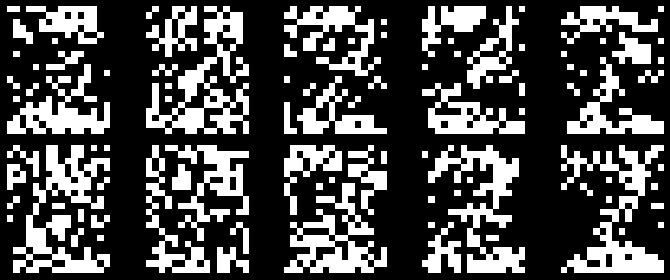

In [10]:
all_generated_imgs = []

image = lire_alpha_digit(binary_alpha_digs_path, characters_index)

for index in range(len(neurons_list)):
    
    rbm = init_DBN(neurons_list[index])
    rbm, loss = train_DBN(rbm, image, epochs, learning_rate, batch_size, verbose=False)

    print('Training with epochs =' , epochs, '\nneurons =', neurons_list[index], '\nlearning_rate = ', learning_rate, '\nbatch_size = ' , batch_size, '\non characters : ', characters_index)
    
    generated_imgs = generer_image_DBN(rbm, n_imgs, n_iter_gibs)
    
    all_generated_imgs.append(generated_imgs)

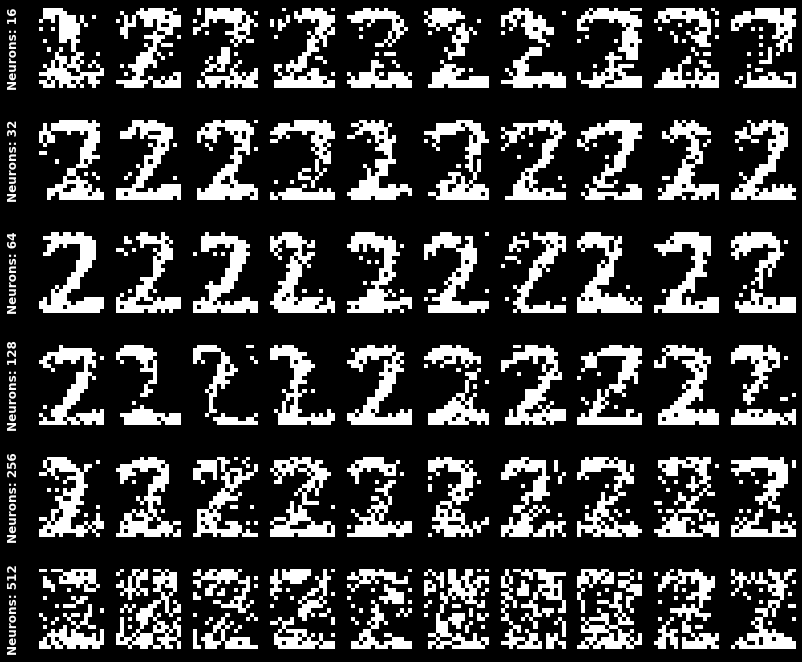

In [11]:
n_rows = len(neurons_list)
n_cols = n_imgs

# Further adjust the figure size if needed
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))

# Ensure axs is 2D for consistent indexing
axs = axs.reshape(n_rows, n_cols) if n_rows > 1 else np.expand_dims(axs, 0)

fig.patch.set_facecolor('black')

# Set spacing between subplots and adjust margins
plt.subplots_adjust(left=0.2, right=0.9, top=0.85, bottom=0.1, hspace=0.3, wspace=0.2)

for i in range(n_rows):
    for j in range(n_cols):
        axs[i, j].imshow(all_generated_imgs[i][j].reshape(20, 16), cmap='gray')
        axs[i, j].axis('off')

        # Adjust the neuron label positioning and font
        if j == 0:  # Only for the first column
            axs[i, j].text(-0.5, 0.5, f'Neurons: {neurons_list[i][1]}', 
                           va='center', ha='left', rotation='vertical', 
                           fontsize=12, color="white", fontweight='bold', transform=axs[i, j].transAxes)

plt.show()

## 2.2 The number of hidden layers

In [12]:
input_layer_neurons = 320
neurons_per_hidden_layer = 128
min_hidden_layers = 1
max_hidden_layers = 5

neurons_list = []
for layer_count in range(min_hidden_layers, max_hidden_layers + 1):
    neurons_list.append([input_layer_neurons] + [neurons_per_hidden_layer] * layer_count)

print(f'Neural network architectures: {neurons_list}')

epochs = 100
learning_rate = 0.01
batch_size = 128
characters_index = [2]

n_iter_gibs = 1000
n_imgs = 10

Neural network architectures: [[320, 128], [320, 128, 128], [320, 128, 128, 128], [320, 128, 128, 128, 128], [320, 128, 128, 128, 128, 128]]


Training with epochs = 100 
neurons = [320, 128] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


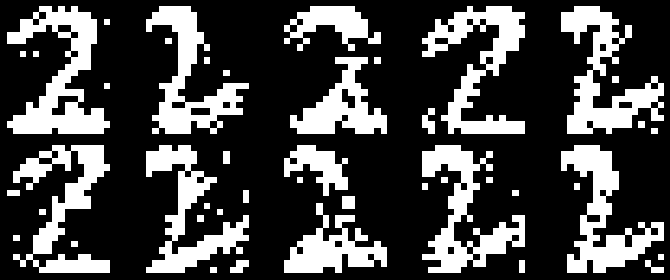

Training with epochs = 100 
neurons = [320, 128, 128] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


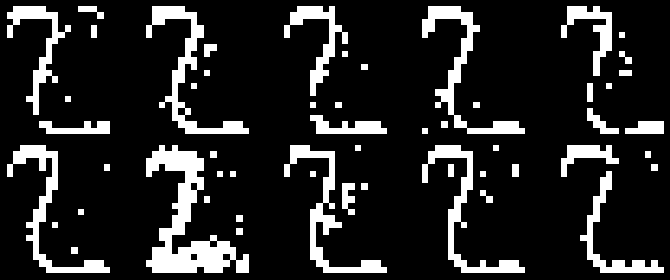

Training with epochs = 100 
neurons = [320, 128, 128, 128] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


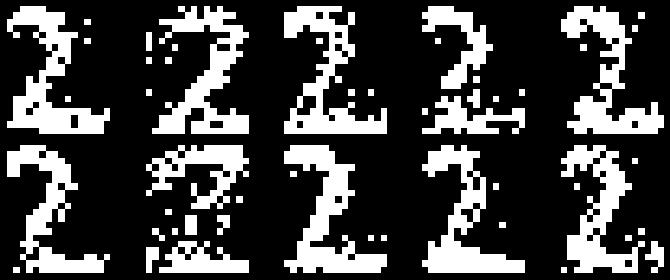

Training with epochs = 100 
neurons = [320, 128, 128, 128, 128] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


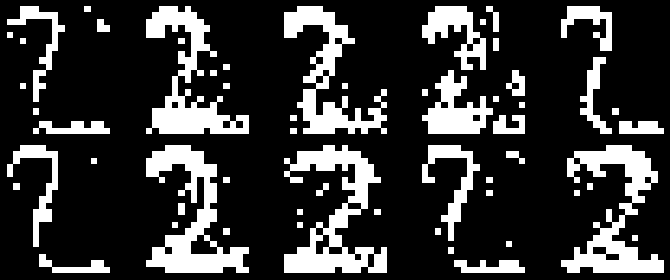

Training with epochs = 100 
neurons = [320, 128, 128, 128, 128, 128] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


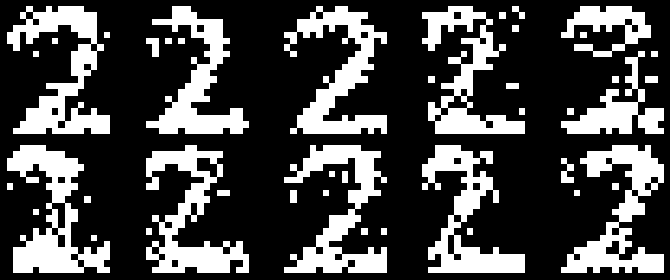

In [13]:
all_generated_imgs = []

image = lire_alpha_digit(binary_alpha_digs_path, characters_index)

for index in range(len(neurons_list)):
    
    rbm_list = init_DBN(neurons_list[index])
    rbm_list, loss = train_DBN(rbm_list, image, epochs, learning_rate, batch_size, verbose=False)

    print('Training with epochs =' , epochs, '\nneurons =', neurons_list[index], '\nlearning_rate = ', learning_rate, '\nbatch_size = ' , batch_size, '\non characters : ', characters_index)
    
    generated_imgs = generer_image_DBN(rbm_list, n_imgs, n_iter_gibs)
    
    all_generated_imgs.append(generated_imgs)

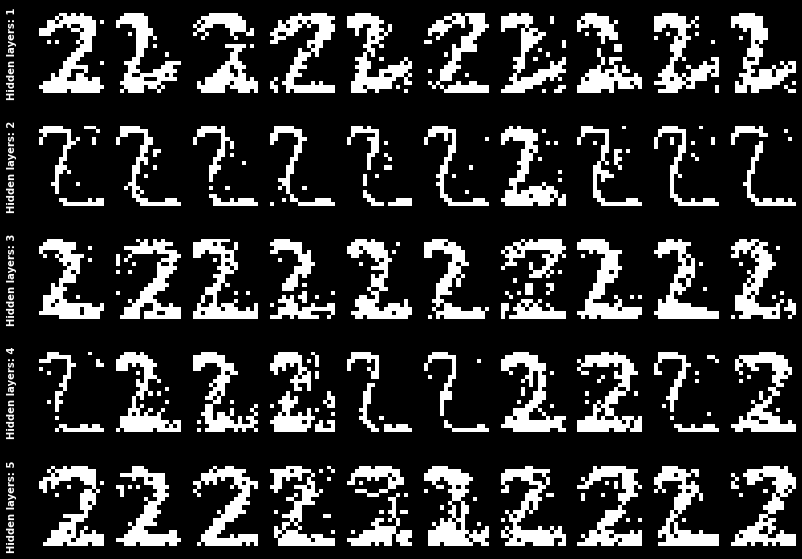

In [14]:
n_rows = len(neurons_list)  
n_cols = n_imgs

# Further adjust the figure size if needed
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))

# Ensure axs is 2D for consistent indexing
axs = axs.reshape(n_rows, n_cols) if n_rows > 1 else np.expand_dims(axs, 0)

fig.patch.set_facecolor('black')

# Set spacing between subplots and adjust margins
plt.subplots_adjust(left=0.2, right=0.9, top=0.85, bottom=0.1, hspace=0.3, wspace=0.2)

for i in range(n_rows):
    for j in range(n_cols):
        axs[i, j].imshow(all_generated_imgs[i][j].reshape(20, 16), cmap='gray')
        axs[i, j].axis('off')

        # Adjust the neuron label positioning and font
        if j == 0:  # Only for the first column
            axs[i, j].text(-0.5, 0.5, f'Hidden layers: {len(neurons_list[i]) - 1}', 
                           va='center', ha='left', rotation='vertical', 
                           fontsize=10, color="white", fontweight='bold', transform=axs[i, j].transAxes)

plt.show()

## 2.3 The number of characters

In [18]:
n_neurons = [320] +  [128]*3
epochs = 100
learning_rate = 0.01
batch_size = 128
characters_list = [[2],  [2, 3], [2, 3, 4], [2, 3, 4, 5], [2, 3, 4, 5, 7], [2, 3, 4, 5, 7, 9]]

n_iter_gibs = 1000
n_imgs = 10

Training with epochs = 100 
neurons = [320, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2]


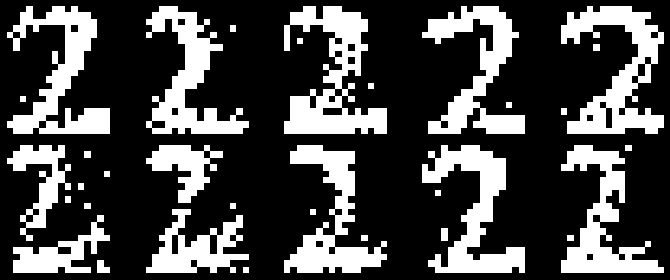

Training with epochs = 100 
neurons = [320, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2, 3]


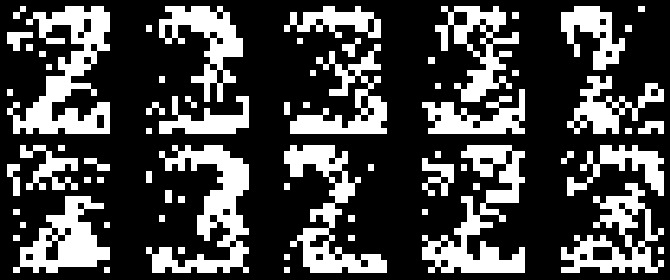

Training with epochs = 100 
neurons = [320, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2, 3, 4]


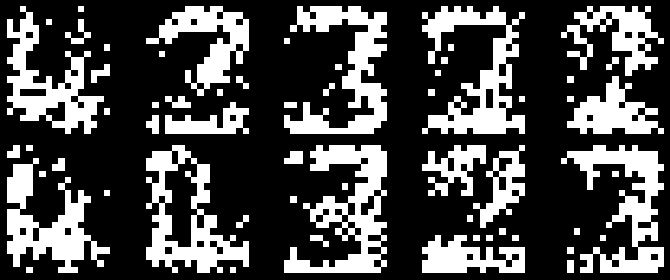

Training with epochs = 100 
neurons = [320, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2, 3, 4, 5]


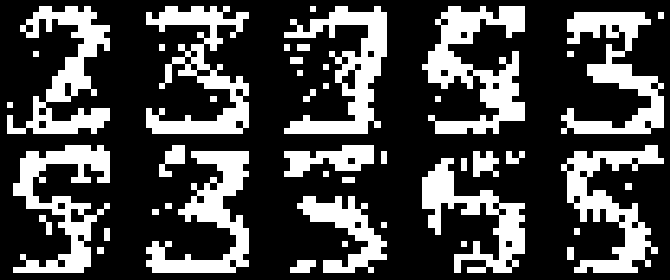

Training with epochs = 100 
neurons = [320, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2, 3, 4, 5, 7]


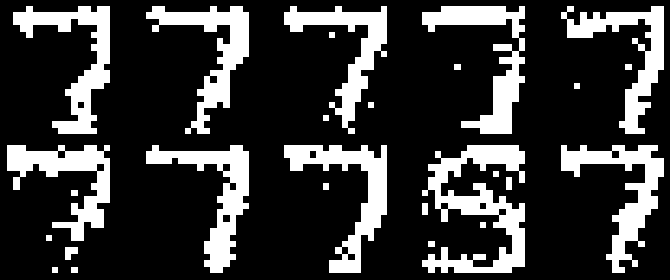

Training with epochs = 100 
neurons = [320, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  128 
on characters :  [2, 3, 4, 5, 7, 9]


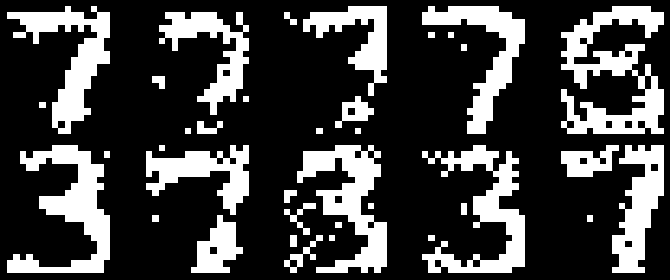

In [19]:
all_generated_imgs = []

for index in range(len(characters_list)):
    
    image = lire_alpha_digit(binary_alpha_digs_path, characters_list[index])
    
    rbm = init_DBN(n_neurons)
    rbm, loss = train_DBN(rbm, image, epochs, learning_rate, batch_size, verbose=False)

    print('Training with epochs =' , epochs, '\nneurons =', n_neurons, '\nlearning_rate = ', learning_rate, '\nbatch_size = ' , batch_size, '\non characters : ', characters_list[index])

    generated_imgs = generer_image_DBN(rbm, n_imgs, n_iter_gibs)
    
    all_generated_imgs.append(generated_imgs)

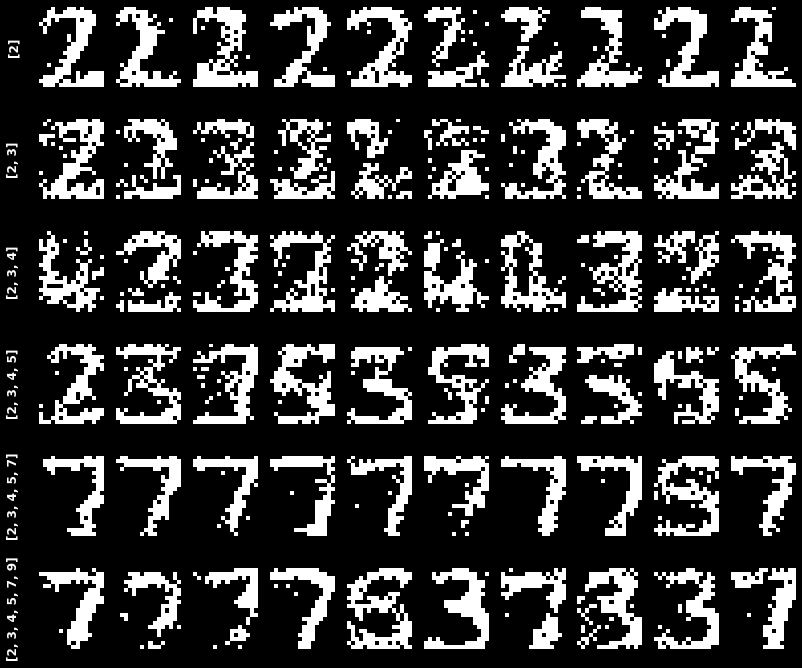

In [20]:
n_rows = len(characters_list)  
n_cols = n_imgs

# Further adjust the figure size if needed
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))

# Ensure axs is 2D for consistent indexing
axs = axs.reshape(n_rows, n_cols) if n_rows > 1 else np.expand_dims(axs, 0)

fig.patch.set_facecolor('black')

# Set spacing between subplots and adjust margins
plt.subplots_adjust(left=0.2, right=0.9, top=0.85, bottom=0.1, hspace=0.3, wspace=0.2)

for i in range(n_rows):
    for j in range(n_cols):
        axs[i, j].imshow(all_generated_imgs[i][j].reshape(20, 16), cmap='gray')
        axs[i, j].axis('off')

        # Adjust the neuron label positioning and font
        if j == 0:  # Only for the first column
            axs[i, j].text(-0.5, 0.5, f'{characters_list[i]}', 
                           va='center', ha='left', rotation='vertical', 
                           fontsize=12, color="white", fontweight='bold', transform=axs[i, j].transAxes)

plt.show()